In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

In [5]:
print(f"pandas  version: {pd.__version__}")
print(f"numpy   version: {np.__version__}")
print(f"seaborn version: {sns.__version__}")

pandas  version: 1.4.4
numpy   version: 1.21.5
seaborn version: 0.11.2


In [6]:
df= pd.read_excel("decisiontree.xlsx")
df.sample(1536)

,Number,HI_CB,HI_CT,HI_PT,HI_DS,HI_LA,HI_Total,HI_TOTAL1
884,885,54.0,40,44.444444,50.0,50.000000,48.088889,Medium
538,539,50.0,60,66.666667,62.5,50.000000,57.208333,Medium
11,12,70.0,70,66.666667,62.5,50.000000,65.208333,Medium
1139,1140,30.0,20,44.444444,37.5,33.333333,32.513889,low
687,688,24.0,30,33.333333,25.0,16.666667,26.116667,low
...,...,...,...,...,...,...,...,...
95,96,44.0,40,33.333333,25.0,16.666667,34.116667,low
67,68,74.0,70,66.666667,62.5,66.666667,68.908333,Medium
835,836,64.0,50,55.555556,62.5,66.666667,59.686111,Medium
1194,1195,50.0,60,55.555556,50.0,50.000000,53.111111,Medium


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     1536 non-null   int64  
 1   HI_CB      1536 non-null   float64
 2   HI_CT      1536 non-null   int64  
 3   HI_PT      1536 non-null   float64
 4   HI_DS      1536 non-null   float64
 5   HI_LA      1536 non-null   float64
 6   HI_Total   1536 non-null   float64
 7   HI_TOTAL1  1536 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 96.1+ KB


In [8]:
df.columns

Index(['Number', 'HI_CB', 'HI_CT', 'HI_PT', 'HI_DS', 'HI_LA', 'HI_Total',
       'HI_TOTAL1'],
      dtype='object')

In [9]:
cols = [
    "HI_CB",
    "HI_CT",
    "HI_PT",
    "HI_DS",
    "HI_LA",
    
]

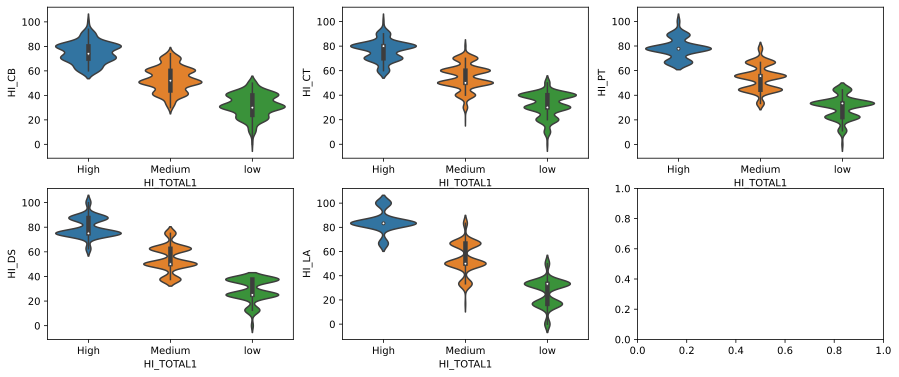

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x="HI_TOTAL1", y=col, data=df, ax=ax[i])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    precision_recall_fscore_support,
    f1_score,
)

In [19]:
df.columns

Index(['Number', 'HI_CB', 'HI_CT', 'HI_PT', 'HI_DS', 'HI_LA', 'HI_Total',
       'HI_TOTAL1'],
      dtype='object')

In [20]:
cols = [
    "HI_CB",
    "HI_CT",
    "HI_PT",
    "HI_DS",
    "HI_LA",
    
]

In [21]:
X = df[cols]  # features
y = df["HI_TOTAL1"]  # label

In [22]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=7
)

In [23]:
model = DecisionTreeClassifier(criterion="gini")  # gini is a default
# model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
X_train.columns

Index(['HI_CB', 'HI_CT', 'HI_PT', 'HI_DS', 'HI_LA'], dtype='object')

In [25]:
model.feature_importances_

array([0.20718343, 0.01640232, 0.43013871, 0.10965858, 0.23661697])

In [26]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

HI_PT    0.430139
HI_LA    0.236617
HI_CB    0.207183
HI_DS    0.109659
HI_CT    0.016402
dtype: float64

In [27]:
y_train.value_counts()

Medium    803
low       313
High      112
Name: HI_TOTAL1, dtype: int64

In [28]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
clf.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['HI_CB', 'HI_CT', 'HI_PT', 'HI_DS', 'HI_LA'], dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'classes_': array(['High', 'Medium', 'low'], dtype=object),
 'n_classes_': 3,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x1ed65142880>}

In [30]:
clf.__dict__["tree_"]

In [31]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier

In [32]:
clf.__dict__["classes_"]

array(['High', 'Medium', 'low'], dtype=object)

In [33]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source


def view_tree(model, X, save_tree_img=False):
    estimators = clf
    dot_graph = export_graphviz(
        estimators,
        feature_names=X.columns,
        class_names=model.__dict__["classes_"],
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    #     with open(f'tree{tree_index}.dot') as f:
    #         dot_graph = f.read()
    g = Source(dot_graph)
    if save_tree_img:
        g.render(f"tree", format="png", view=False, cleanup=True)
    return g

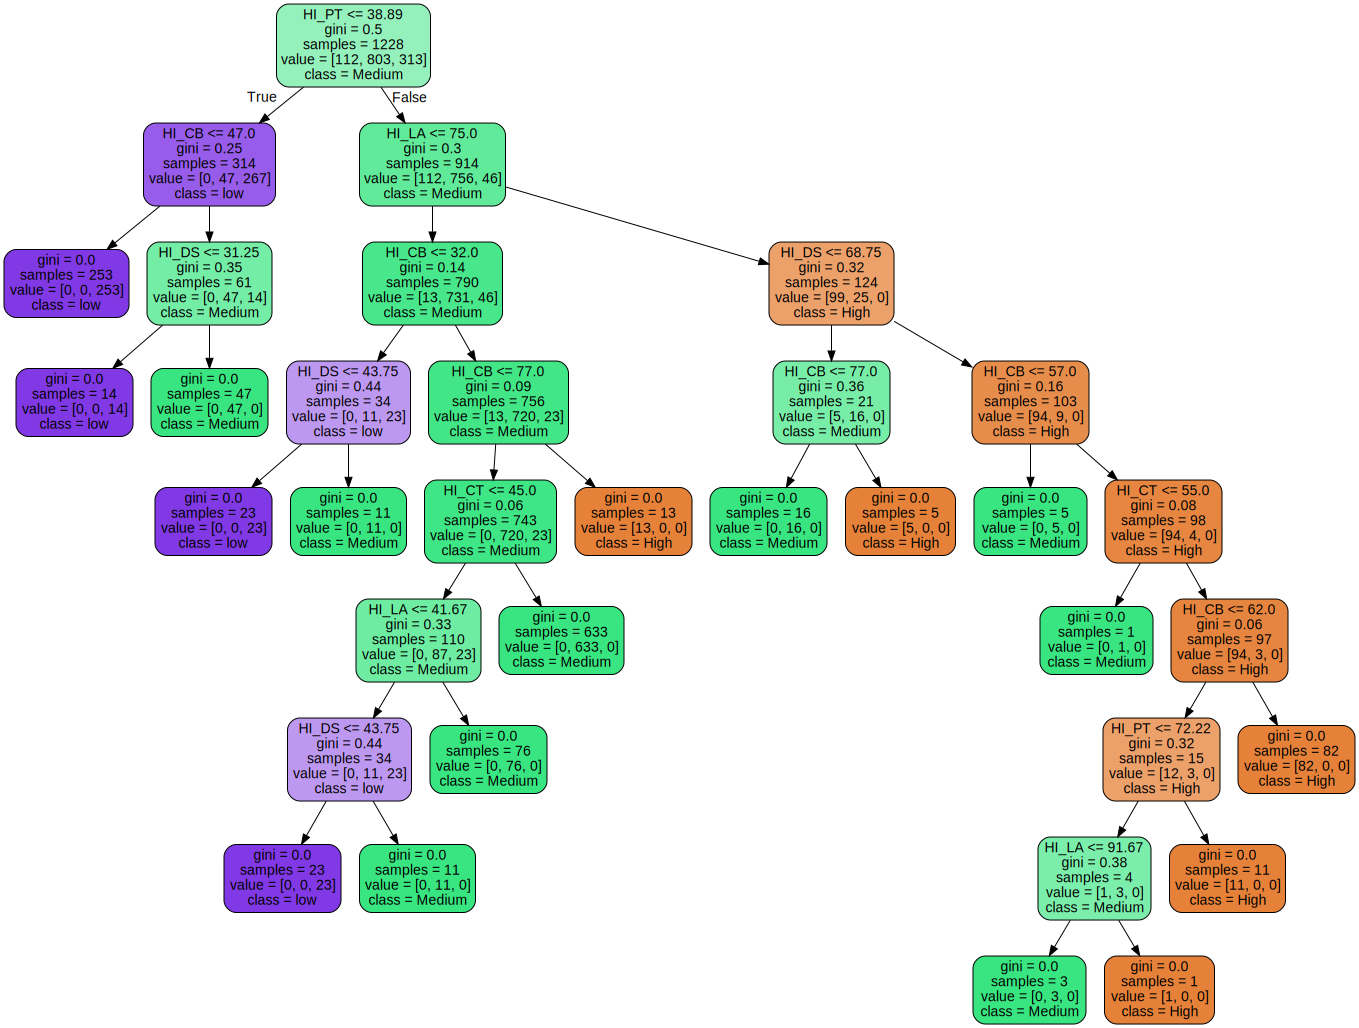

In [34]:
view_tree(clf, X_test, save_tree_img=False)

In [35]:
cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[ 28,   0,   0],
       [  0, 201,   0],
       [  0,   0,  79]], dtype=int64)

In [36]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       140
      Medium       1.00      1.00      1.00      1004
         low       1.00      1.00      1.00       392

    accuracy                           1.00      1536
   macro avg       1.00      1.00      1.00      1536
weighted avg       1.00      1.00      1.00      1536



In [37]:
model.tree_.impurity  # gini

array([0.49911803, 0.25455394, 0.        , 0.35366837, 0.        ,
       0.        , 0.29830164, 0.14012818, 0.43771626, 0.        ,
       0.        , 0.09174925, 0.05999467, 0.3307438 , 0.43771626,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.32193028, 0.36281179, 0.        , 0.        , 0.15948723,
       0.        , 0.07830071, 0.        , 0.05994261, 0.32      ,
       0.375     , 0.        , 0.        , 0.        , 0.        ])

In [38]:
model.tree_.value

array([[[112., 803., 313.]],

       [[  0.,  47., 267.]],

       [[  0.,   0., 253.]],

       [[  0.,  47.,  14.]],

       [[  0.,   0.,  14.]],

       [[  0.,  47.,   0.]],

       [[112., 756.,  46.]],

       [[ 13., 731.,  46.]],

       [[  0.,  11.,  23.]],

       [[  0.,   0.,  23.]],

       [[  0.,  11.,   0.]],

       [[ 13., 720.,  23.]],

       [[  0., 720.,  23.]],

       [[  0.,  87.,  23.]],

       [[  0.,  11.,  23.]],

       [[  0.,   0.,  23.]],

       [[  0.,  11.,   0.]],

       [[  0.,  76.,   0.]],

       [[  0., 633.,   0.]],

       [[ 13.,   0.,   0.]],

       [[ 99.,  25.,   0.]],

       [[  5.,  16.,   0.]],

       [[  0.,  16.,   0.]],

       [[  5.,   0.,   0.]],

       [[ 94.,   9.,   0.]],

       [[  0.,   5.,   0.]],

       [[ 94.,   4.,   0.]],

       [[  0.,   1.,   0.]],

       [[ 94.,   3.,   0.]],

       [[ 12.,   3.,   0.]],

       [[  1.,   3.,   0.]],

       [[  0.,   3.,   0.]],

       [[  1.,   0.,   0.]],

       [[ 

In [39]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

In [40]:
# switch to interactive matplotlib
# %matplotlib qt
# %pylab qt

# switch back to inline mode
%matplotlib inline

Text(0.5, 0, 'HI_PT')

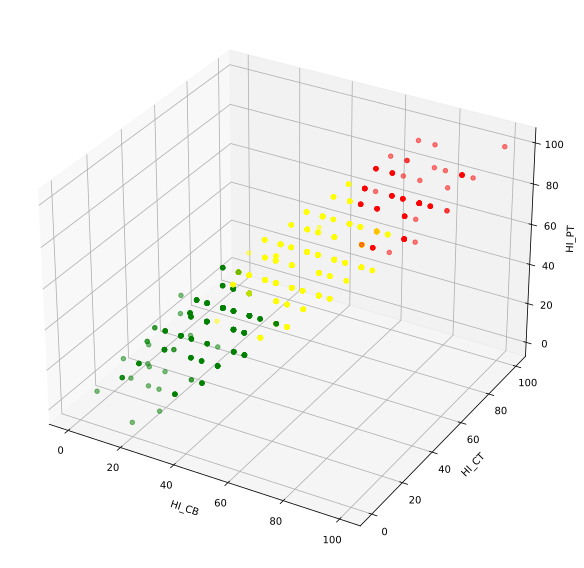

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
colors = y.map({"low": "green", "Medium": "yellow", "High": "red"})
ax.scatter(X["HI_CB"], X["HI_CT"], X["HI_PT"], alpha=0.5, c=colors)
ax.set_xlabel("HI_CB")
ax.set_ylabel("HI_CT")
ax.set_zlabel("HI_PT")